### 1. UCI 

In [69]:
folder='UCI HAR Dataset/'
fname = folder+'test/y_test.txt'
def getY(_fname):
    with open(_fname) as f:
        fread=f.read()
    flist = fread.strip().split('\n')
    print(_fname,"처리완료 : ", len(flist))
    return (flist)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

UCI HAR Dataset/train/y_train.txt 처리완료 :  7352


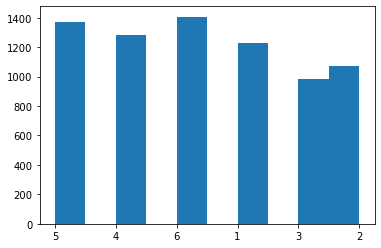

In [70]:
fname = folder + 'train/y_train.txt'
flist = getY(fname)
plt.hist(flist)
plt.show()
# 라벨데이터가 균등하다 -> 별도의 데이터 증폭 처리는 필요 없음
# 이산형 자료로 분류 모델에 적합하다
# 센서 데이터 -> DT 사용가능(확률적 센서 오류는 매우 적음)

In [23]:
import re

In [24]:
fname = folder + 'test/X_test.txt'
with open(fname) as f:
    fread = f.read()
flist = fread.split('\n')
re.compile("\s+").split('\n')
f0 = re.compile("\s+").split(flist[0].strip())
len(f0)

561

In [73]:
fname = folder + 'test/X_test.txt'
def getX(_fname):
    with open(_fname) as f:
        fread = f.read()
    flist = fread.split('\n')
    res =[]
    for f in flist:
        freg = re.compile("\s+").split(f.strip())
        if(freg):
            res.append(freg)
    print(fname,"처리완료 : ",len(res))
    return res

In [74]:
def getData():
    fname = folder + 'test/X_test.txt'
    X_test =  getX(fname)

    fname = folder + 'test/y_test.txt'
    y_test =  getY(fname)

    fname = folder + 'train/X_train.txt'
    X_train =  getX(fname)

    fname = folder + 'train/y_train.txt'
    y_train =  getY(fname)
    fname = folder+'features.txt'
    return (X_train,X_test,y_train,y_test)

In [75]:
X_train,X_test,y_train,y_test = getData()

UCI HAR Dataset/test/X_test.txt 처리완료 :  2948
UCI HAR Dataset/test/y_test.txt 처리완료 :  2947
UCI HAR Dataset/test/X_test.txt 처리완료 :  7353
UCI HAR Dataset/train/y_train.txt 처리완료 :  7352


In [76]:
X_test=X_test[:2947]

X_train = X_train[:7352]
print(len(X_train),len(X_test))

7352 2947


In [57]:
coldf = pd.read_csv(folder+"features.txt",sep='\s+',header=None,names=['idx','cname']).set_index('idx')
coldf.head()

,cname
idx,
1,tBodyAcc-mean()-X
2,tBodyAcc-mean()-Y
3,tBodyAcc-mean()-Z
4,tBodyAcc-std()-X
5,tBodyAcc-std()-Y


In [65]:
Xtraindf = pd.DataFrame(data=X_train,columns=coldf['cname'].values).fillna(0)
Xtraindf.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,-9.2352702e-001,-9.3472378e-001,...,-7.4323027e-002,-2.9867637e-001,-7.1030407e-001,-1.1275434e-001,3.0400372e-002,-4.6476139e-001,-1.8445884e-002,-8.4124676e-001,1.7994061e-001,-5.8626924e-002
1,2.7841883e-001,-1.6410568e-002,-1.2352019e-001,-9.9824528e-001,-9.7530022e-001,-9.6032199e-001,-9.9880719e-001,-9.7491437e-001,-9.5768622e-001,-9.4306751e-001,...,1.5807454e-001,-5.9505094e-001,-8.6149931e-001,5.3476955e-002,-7.4345661e-003,-7.3262621e-001,7.0351059e-001,-8.4478760e-001,1.8028889e-001,-5.4316717e-002
2,2.7965306e-001,-1.9467156e-002,-1.1346169e-001,-9.9537956e-001,-9.6718701e-001,-9.7894396e-001,-9.9651994e-001,-9.6366837e-001,-9.7746859e-001,-9.3869155e-001,...,4.1450281e-001,-3.9074815e-001,-7.6010372e-001,-1.1855926e-001,1.7789948e-001,1.0069921e-001,8.0852908e-001,-8.4893347e-001,1.8063731e-001,-4.9117815e-002
3,2.7917394e-001,-2.6200646e-002,-1.2328257e-001,-9.9609149e-001,-9.8340270e-001,-9.9067510e-001,-9.9709947e-001,-9.8274984e-001,-9.8930250e-001,-9.3869155e-001,...,4.0457253e-001,-1.1729020e-001,-4.8284451e-001,-3.6787973e-002,-1.2892494e-002,6.4001104e-001,-4.8536645e-001,-8.4864938e-001,1.8193476e-001,-4.7663183e-002
4,2.7662877e-001,-1.6569655e-002,-1.1536185e-001,-9.9813862e-001,-9.8081727e-001,-9.9048163e-001,-9.9832113e-001,-9.7967187e-001,-9.9044113e-001,-9.4246912e-001,...,8.7753013e-002,-3.5147093e-001,-6.9920515e-001,1.2332005e-001,1.2254196e-001,6.9357829e-001,-6.1597061e-001,-8.4786525e-001,1.8515116e-001,-4.3892254e-002


In [64]:
Xtraindf.iloc[:,1].fillna(0).values.astype(float) #astype 문자형태를 숫자형태로 변경해줌

array([-0.02029417, -0.01641057, -0.01946716, ..., -0.01884304,
       -0.01242312,  0.        ])

(array([1.000e+00, 3.000e+00, 6.000e+00, 4.000e+00, 6.385e+03, 9.300e+02,
        1.900e+01, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

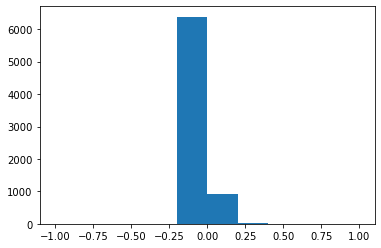

In [66]:
sdata = Xtraindf.iloc[:,1].values.astype(float)
plt.hist(sdata)

(array([[1.000e+00, 3.000e+00, 6.000e+00, 4.000e+00, 6.385e+03, 9.300e+02,
         1.900e+01, 3.000e+00, 1.000e+00, 1.000e+00],
        [3.000e+00, 1.000e+00, 1.500e+01, 1.980e+02, 7.014e+03, 1.050e+02,
         1.200e+01, 1.000e+00, 1.000e+00, 3.000e+00],
        [4.007e+03, 8.800e+01, 3.950e+02, 1.270e+03, 7.200e+02, 4.970e+02,
         2.660e+02, 8.500e+01, 2.000e+01, 5.000e+00],
        [3.793e+03, 1.770e+02, 7.500e+01, 4.450e+02, 1.250e+03, 9.910e+02,
         4.680e+02, 1.220e+02, 2.700e+01, 5.000e+00]]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 4 BarContainer objects>)

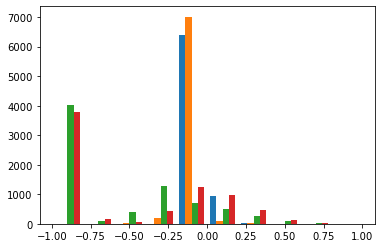

In [67]:
sdata = Xtraindf.iloc[:,1:5].values.astype(float)
plt.hist(sdata)

(array([[1.000e+00, 3.000e+00, 6.000e+00, 4.000e+00, 6.385e+03, 9.300e+02,
         1.900e+01, 3.000e+00, 1.000e+00, 1.000e+00],
        [3.000e+00, 1.000e+00, 1.500e+01, 1.980e+02, 7.014e+03, 1.050e+02,
         1.200e+01, 1.000e+00, 1.000e+00, 3.000e+00],
        [4.007e+03, 8.800e+01, 3.950e+02, 1.270e+03, 7.200e+02, 4.970e+02,
         2.660e+02, 8.500e+01, 2.000e+01, 5.000e+00],
        [3.793e+03, 1.770e+02, 7.500e+01, 4.450e+02, 1.250e+03, 9.910e+02,
         4.680e+02, 1.220e+02, 2.700e+01, 5.000e+00],
        [3.808e+03, 1.990e+02, 5.990e+02, 1.333e+03, 7.430e+02, 4.220e+02,
         1.530e+02, 5.600e+01, 3.200e+01, 8.000e+00],
        [4.013e+03, 1.010e+02, 6.400e+02, 1.272e+03, 6.410e+02, 4.040e+02,
         2.130e+02, 4.400e+01, 2.000e+01, 5.000e+00],
        [3.802e+03, 1.730e+02, 8.700e+01, 5.810e+02, 1.294e+03, 9.180e+02,
         3.950e+02, 8.500e+01, 1.400e+01, 4.000e+00],
        [3.803e+03, 1.900e+02, 6.280e+02, 1.305e+03, 7.650e+02, 4.350e+02,
         1.460e+02, 5.

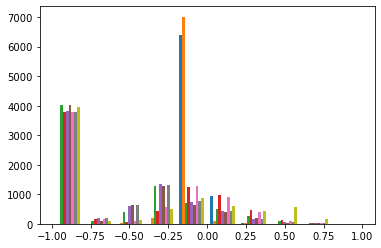

In [68]:
sdata = Xtraindf.iloc[:,1:10].values.astype(float)
plt.hist(sdata)
# 모여있다는 것은 변별력이 없다는 뜻
# 퍼져있는 것이 유의미함

In [84]:
len(X_train)

7352

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
def checkDT(_dep):
    dtc = DecisionTreeClassifier(max_depth=_dep)
    dtc.fit(X_train,y_train)
    pred = dtc.predict(X_test)
    accres = accuracy_score(pred,y_test)
    return(_dep,accres)

In [117]:
res = []
for i in range(1,30):
    res.append(checkDT(i))

In [ ]:
rdf = pd.DataFrame(data=res,columns=['dep','acc']).set_index('dep')
rdf.max()

In [ ]:
rdf.plot()
plt.ylim(0.8,1.0)
plt.show()

In [93]:
accres = dtc.predict(X_test,y_test)

In [79]:
len(accres)

2947

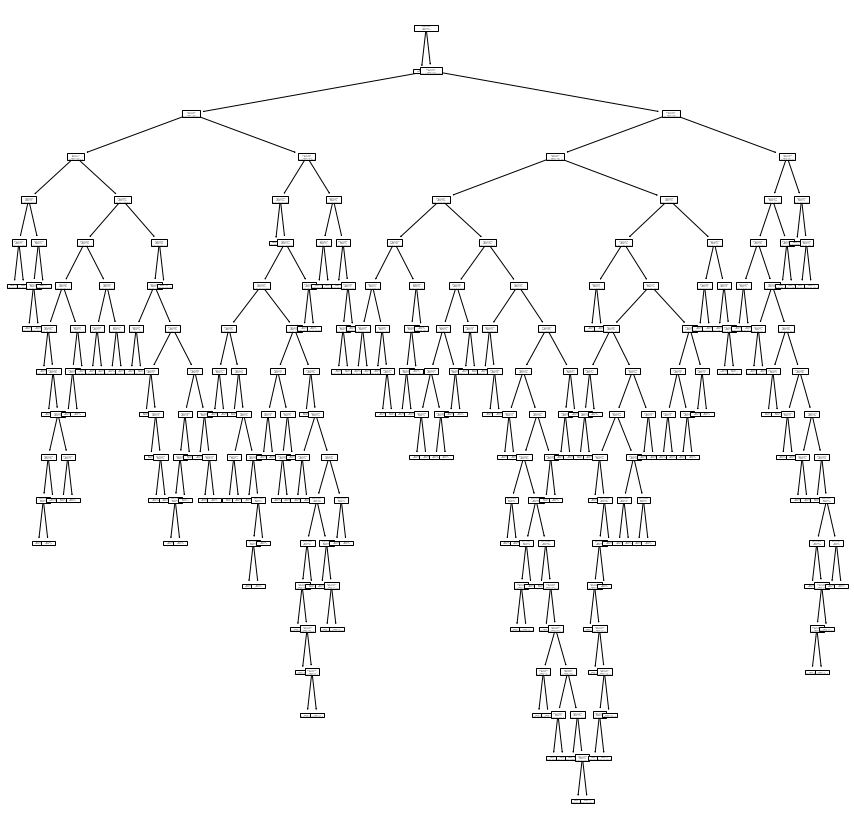

In [90]:
from sklearn.tree import plot_tree
fig,ax = plt.subplots(figsize=(15,15))
plot_tree(dtc)
plt.show()

In [107]:
# 중요 요소 검사
fimp = dtc.feature_importances_
zimp = list(zip(coldf['cname'],fimp))
impdf = pd.DataFrame(zimp,columns=['col','imp']).set_index('col')
sortdf=impdf.sort_values(by='imp',ascending=False)
sortdf.head()
#impdf[:20].plot.bar()

,imp
col,
tGravityAcc-min()-X,0.239945
"fBodyAccJerk-bandsEnergy()-1,16",0.201332
"angle(Y,gravityMean)",0.131643
fBodyAccMag-energy(),0.109366
"tGravityAcc-arCoeff()-Z,2",0.096173


<AxesSubplot:xlabel='col'>

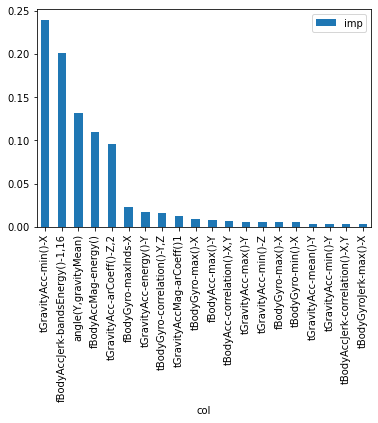

In [111]:
timp20 = sortdf[:20]
timp20.plot.bar()

In [98]:
import seaborn as sns

In [ ]:
sns.barplot(y=coldf['cname'].)